**ECE 447: Data Analysis and Machine Learning for Engineers**

# Assignment A2
**Decision Trees**

*Tarush Shankar (1647043)*

This Assignment Solution is the work of Tarush Shankar (SID: 1647043) and has been performed in an individual capacity without any collaboration with others

The Dataset Utilized for this Assignment has been Obtained From eClass as data.csv file.

In [338]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import classification_report,confusion_matrix
import warnings
warnings.simplefilter("ignore")

Your task is to build several decision tree-based systems to predict if an individual is **E** or **P**.

You have to identify a single model that provides the best performance.

# Data Exploration

In the begining, you should perform data exploration. Steps:

1.   load data and 'take a look' at it (done below)
2.   analyze it (display, visualize)
3.   learn more about attributes/features


## Reading Data

In [339]:
df=pd.read_csv('/content/data.csv')

In [340]:
#To see the first five rows of the dataset we can use dataset.head()
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,e,x,s,y,t,a,f,c,n,k,...,s,w,w,p,w,o,p,n,n,g
1,e,b,s,w,t,l,f,c,n,n,...,s,w,w,p,w,o,p,n,n,m
2,e,x,s,g,f,n,f,w,n,k,...,s,w,w,p,w,o,e,n,a,g
3,e,x,y,y,t,a,f,c,n,n,...,s,w,w,p,w,o,p,k,n,g
4,e,b,s,w,t,a,f,c,n,g,...,s,w,w,p,w,o,p,k,n,m


In [341]:
df


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,e,x,s,y,t,a,f,c,n,k,...,s,w,w,p,w,o,p,n,n,g
1,e,b,s,w,t,l,f,c,n,n,...,s,w,w,p,w,o,p,n,n,m
2,e,x,s,g,f,n,f,w,n,k,...,s,w,w,p,w,o,e,n,a,g
3,e,x,y,y,t,a,f,c,n,n,...,s,w,w,p,w,o,p,k,n,g
4,e,b,s,w,t,a,f,c,n,g,...,s,w,w,p,w,o,p,k,n,m
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,p,f,y,c,f,m,a,c,b,y,...,y,c,c,p,w,n,n,w,c,d
8120,p,k,y,n,f,s,f,c,n,b,...,k,p,w,p,w,o,e,w,v,l
8121,p,k,s,e,f,y,f,c,n,b,...,s,p,w,p,w,o,e,w,v,d
8122,p,k,y,n,f,f,f,c,n,b,...,s,p,w,p,w,o,e,w,v,d


In [342]:
print("Data shape:")
print(df.shape)
print("Data info:")
print(df.info())

Data shape:
(8124, 23)
Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   ob

## Data Exploration/Visualization

Use the space below to insert your code for data exploration ... for example, histogram (s).

Given that our dataset is comprised of non-numeric data, both for the final classification and the feature values that lead to a final classified value, we will first explore the data to make sure if its balanced.

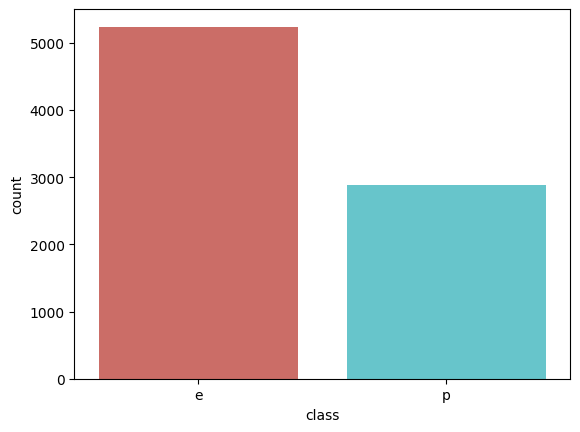

In [343]:
sns.countplot(x = 'class',data=df,palette='hls')
plt.show()

As we can see, the dataset is pretty unbalanced with the targets labelled as 'e' to be much frequent in our dataset than the targets present for 'p'.

## Data-Preprocessing

Label encoding is ideal for **ordinal categorical** data that exhibit a natural sequence or ranking. For instance, educational qualifications such as "High School," "Bachelor's," "Master's," and "Ph.D." can be numerically represented as 0, 1, 2, and 3, respectively.

Conversely, for **nominal categorical data without an inherent order**, one-hot encoding tends to be the preferred method. This approach transforms each category into a separate binary column, with each instance marked by **1** in its respective column and **0s** in all others.

Using label encoding on nominal data could erroneously suggest to models an order among categories that does not exist, potentially skewing outcomes.
One-hot encoding, however, can greatly expand your dataset's dimensionality, risking the curse of dimensionality with numerous unique categories. In such scenarios, applying feature selection or dimensionality reduction methods becomes necessary.

Hence, for the training data, we will employ one-hot encoding or dummy labels, while label encoding will be reserved for the target/output.

Below, there is a code for splitting the data frame (df) into X (input) and output (y).

1st: converting X into one-hot encoding using pandas' get_dummies() function \
(https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html)

2nd: converting y using label encoding using LabelEncoder() function \
(https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html).

In [344]:
y = df['class']
X = df.drop(labels =['class'],axis=1)

In [345]:
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,y,t,a,f,c,n,k,e,...,s,w,w,p,w,o,p,n,n,g
1,b,s,w,t,l,f,c,n,n,e,...,s,w,w,p,w,o,p,n,n,m
2,x,s,g,f,n,f,w,n,k,t,...,s,w,w,p,w,o,e,n,a,g
3,x,y,y,t,a,f,c,n,n,e,...,s,w,w,p,w,o,p,k,n,g
4,b,s,w,t,a,f,c,n,g,e,...,s,w,w,p,w,o,p,k,n,m


In [346]:
X = pd.get_dummies(X)
X.head()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [347]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y = encoder.fit_transform(y)

In [348]:
y

array([0, 0, 0, ..., 1, 1, 1])

In [349]:
(y==0).sum()

5239

In [350]:
(y==1).sum()

2885

In [351]:
len(y)

8124

The encoder has assigned the value of e to 0 and p to 1.

# Decision Tree

1. Use *train_test_split()* to split the dataset into a training set and a test set (use the same split for all models).

2. 'Play around' with values of hyperparameters, and measure your model’s performance (accuracy, precision, recall) on the test set.

In [352]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=50)

In [353]:
y_train

array([0, 0, 0, ..., 0, 1, 1])

In [354]:
len(y_train) + len(y_test)

8124

In [355]:
leny_train = len(y_train)

In [356]:
leny_test = len(y_test)

In [357]:
leny_train - (y_train==1).sum()

3161

In [358]:
e_train = (y_train ==0).sum()
e_test = (y_test ==0).sum()
p_train = (y_train ==1).sum()
p_test = (y_test == 1).sum()
print(f"The number of data entries with label 'e' in training set : { e_train}")
print(f"The number of data entries with label 'e' in testing set : { e_test}")
print(f"The number of data entries with label 'p' in training set : { p_train}")
print(f"The number of data entries with label 'p' in testing set : { p_test}")

The number of data entries with label 'e' in training set : 3161
The number of data entries with label 'e' in testing set : 2078
The number of data entries with label 'p' in training set : 1713
The number of data entries with label 'p' in testing set : 1172


The training and the testing split has been done so such that labels 'e' and 'p' are equally split and represented in the training and the testing data sets.

In [359]:
#Standard Scalar
### Instantiate the Standard Scaler
scaler = StandardScaler()

### Fit the scaler to the training set
scaler.fit(X_train)

### Transform the training set
X_train_scaled = scaler.transform(X_train)

### Transform the test set
X_test_scaled = scaler.transform(X_test)


To ensure that all the feature values of the dataset are equally accounted for in the dataset, we will also perform a feature scalling and measure the performance of the models to single out whether a scaled or an unscaled dataset is better for aiding in predictions.

## Training with Gini index



1.   What is the Gini index?
2.   Why do we use the Gini index?

Put your short answers below, and then train a model


### Answers

1. Gini Index is one of the metrices which a decision tree model uses in deciding how to split the features that would be most sensible and build the tree of split values. The process is iterative and once the metric has identified a particular way of splitting the feature that would be the best suited, it would then move on to evaluating other feature variable untill all the features have been covered. Depending on the kind of problem, let's say we are utilizing decision tree for the problem of binary classification. Then Gini Index as a numerical Cost function will indicate how well a split decision has been made to make a decision tree. Gini score indicates how well classes mix when a split decision is made and a perfect split would yield in a 0 score.

2. Gini Index as a metric of decision tree model split and a cost function is used to evaluate how well the classes split when a particular decision of splitting class values is made. In turn, this is used to evaluate, parameterize and compare different types of splits and get the best decision of split out.

### Training

In [360]:
decisiontreegini1 = DecisionTreeClassifier(criterion = 'gini',max_depth= 10)

In [361]:
decisiontreegini1.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=10)

In [362]:
dtgini_unscaled_pred = decisiontreegini1.predict(X_test)

In [363]:
from sklearn import metrics
# Classification Report

### Get performance metrics
dtgini_unscaled_score = metrics.accuracy_score(y_test, dtgini_unscaled_pred) * 100
dtgini_unscaled_precision = metrics.precision_score(y_test, dtgini_unscaled_pred) * 100
dtgini_unscaled_recall = metrics.recall_score(y_test, dtgini_unscaled_pred) * 100
dtgini_unscaled_F1 = metrics.f1_score(y_test, dtgini_unscaled_pred) * 100

### Print classification report
print("Classification report for {}:\n{}".format(decisiontreegini1 , metrics.classification_report(y_test, dtgini_unscaled_pred)))
print("Accuracy score:", dtgini_unscaled_score)
print("F1 score:", dtgini_unscaled_F1)
print("Precision score:",dtgini_unscaled_precision)
print("Recall score",dtgini_unscaled_recall)

Classification report for DecisionTreeClassifier(max_depth=10):
              precision    recall  f1-score   support

           0       0.95      0.76      0.84      2078
           1       0.68      0.93      0.79      1172

    accuracy                           0.82      3250
   macro avg       0.82      0.85      0.82      3250
weighted avg       0.86      0.82      0.82      3250

Accuracy score: 82.06153846153846
F1 score: 78.94546767786204
Precision score: 68.44082654978084
Recall score 93.25938566552901



 Confusion Matrix for Model 1:



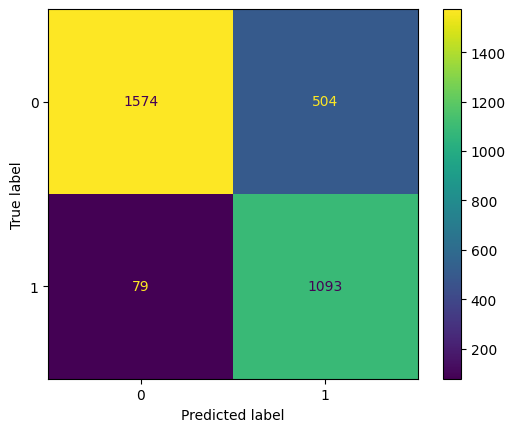

In [364]:
#Creating a Visual Confusion Matrix for Model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm_model1 = confusion_matrix(y_test,dtgini_unscaled_pred)
disp_model1 = ConfusionMatrixDisplay(confusion_matrix= cm_model1)
print("\n Confusion Matrix for Model 1:\n")
disp_model1.plot()


Trying the same classification but with a scaled dataset

In [365]:
decisiontreegini2 = DecisionTreeClassifier(criterion = 'gini',max_depth = 10)

In [366]:
decisiontreegini2.fit(X_train_scaled,y_train)

DecisionTreeClassifier(max_depth=10)

In [367]:
dtgini_scaled_pred = decisiontreegini1.predict(X_test_scaled)

In [368]:
# Classification Report

### Get performance metrics
dtgini_scaled_score = metrics.accuracy_score(y_test, dtgini_scaled_pred) * 100
dtgini_scaled_precision = metrics.precision_score(y_test, dtgini_scaled_pred) * 100
dtgini_scaled_recall = metrics.recall_score(y_test, dtgini_scaled_pred) * 100
dtgini_scaled_F1 = metrics.f1_score(y_test, dtgini_scaled_pred) * 100

### Print classification report
print("Classification report for {}:\n{}".format(decisiontreegini2 , metrics.classification_report(y_test, dtgini_scaled_pred)))
print("Accuracy score:", dtgini_scaled_score)
print("F1 score:", dtgini_scaled_F1)
print("Precision score:",dtgini_scaled_precision)
print("Recall score",dtgini_scaled_recall)

Classification report for DecisionTreeClassifier(max_depth=10):
              precision    recall  f1-score   support

           0       0.87      0.84      0.86      2078
           1       0.73      0.77      0.75      1172

    accuracy                           0.82      3250
   macro avg       0.80      0.81      0.80      3250
weighted avg       0.82      0.82      0.82      3250

Accuracy score: 81.78461538461539
F1 score: 75.41528239202657
Precision score: 73.46278317152104
Recall score 77.47440273037543



 Confusion Matrix for Model 2:



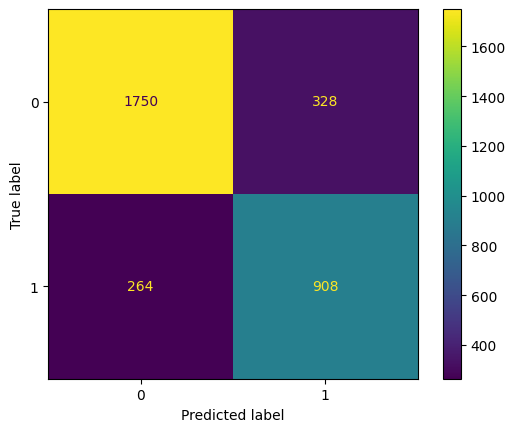

In [369]:
cm_model2 = confusion_matrix(y_test,dtgini_scaled_pred)
disp_model2 = ConfusionMatrixDisplay(confusion_matrix= cm_model2)
print("\n Confusion Matrix for Model 2:\n")
disp_model2.plot()


Observation: The utilization of a scaled dataset seems to downgrade the performance of Decision Tree with the criterion split of Gini score. We can explore this phenomenon further with different selection criterion and models.

## Training with Entropy



1.  What is entropy?
2.  Why do we use entropy?

Put your short answers below, and then train a model


### Answers

1. Entropy is another metric of decision tree building which helps us understand how pure or impure a collection of samples with different classes is. It is the measure of disorder(in this case, impure data points) If a collection of sample contains data points from the same class, then the value of the entropy tentamounts to 0. If the collection of samples is equally split between the positive and the negative split, then the value of the entropy is 1. The formula can be best summarised as:
$$
H(S) = \sum_{k=1}^K -p_{k}\log(p_{k}),
$$

where K is the number of classes and $p_{k}$ represents the proportion of the training observations from the S set.

2. We use entropy as a metric to build a sensible decision trees and guage the effectiveness of the split in data points based on conditional criterion and evaluate the presence of impurity in the decision tree nodes and the values encompassed in it.

### Training

In [370]:
decisiontreeentropy1 = DecisionTreeClassifier(criterion = 'entropy',max_depth = 10)


In [371]:
decisiontreeentropy1.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10)

In [372]:
dtentropy_unscaled_pred = decisiontreeentropy1.predict(X_test)

In [373]:

# Classification Report

### Get performance metrics
dtentropy_unscaled_score = metrics.accuracy_score(y_test, dtentropy_unscaled_pred) * 100
dtentropy_unscaled_precision = metrics.precision_score(y_test, dtentropy_unscaled_pred) * 100
dtentropy_unscaled_recall = metrics.recall_score(y_test, dtentropy_unscaled_pred) * 100
dtentropy_unscaled_F1 = metrics.f1_score(y_test, dtentropy_unscaled_pred) * 100

### Print classification report
print("Classification report for {}:\n{}".format(decisiontreeentropy1 , metrics.classification_report(y_test, dtentropy_unscaled_pred)))
print("Accuracy score:", dtentropy_unscaled_score)
print("F1 score:", dtentropy_unscaled_F1)
print("Precision score:",dtentropy_unscaled_precision)
print("Recall score",dtentropy_unscaled_recall)

Classification report for DecisionTreeClassifier(criterion='entropy', max_depth=10):
              precision    recall  f1-score   support

           0       0.95      0.76      0.84      2078
           1       0.69      0.93      0.79      1172

    accuracy                           0.82      3250
   macro avg       0.82      0.84      0.82      3250
weighted avg       0.85      0.82      0.82      3250

Accuracy score: 82.0923076923077
F1 score: 78.8977519941987
Precision score: 68.60025220680959
Recall score 92.83276450511946



 Confusion Matrix for Model 3:



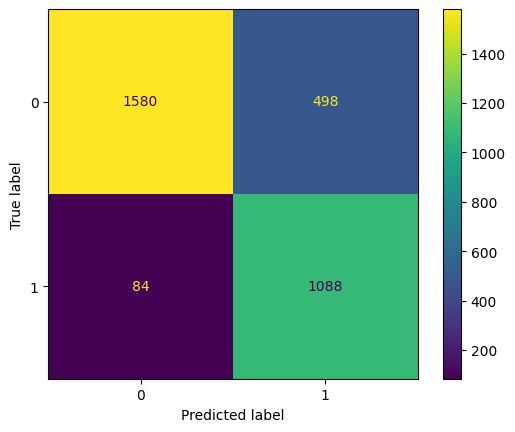

In [374]:
#Creating a Visual Confusion Matrix for Model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm_model3 = confusion_matrix(y_test,dtentropy_unscaled_pred)
disp_model3 = ConfusionMatrixDisplay(confusion_matrix= cm_model3)
print("\n Confusion Matrix for Model 3:\n")
disp_model3.plot()

In [375]:
decisiontreeentropy2 = DecisionTreeClassifier(criterion = 'entropy',max_depth = 10)

In [376]:
decisiontreeentropy2.fit(X_train_scaled,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10)

In [377]:
dtentropy_scaled_pred = decisiontreeentropy2.predict(X_test_scaled)

In [378]:
# Classification Report

### Get performance metrics
dtentropy_scaled_score = metrics.accuracy_score(y_test, dtentropy_scaled_pred) * 100
dtentropy_scaled_precision = metrics.precision_score(y_test, dtentropy_scaled_pred) * 100
dtentropy_scaled_recall = metrics.recall_score(y_test, dtentropy_scaled_pred) * 100
dtentropy_scaled_F1 = metrics.f1_score(y_test, dtentropy_scaled_pred) * 100

### Print classification report
print("Classification report for {}:\n{}".format(decisiontreeentropy2 , metrics.classification_report(y_test, dtentropy_scaled_pred)))
print("Accuracy score:", dtentropy_scaled_score)
print("F1 score:", dtentropy_scaled_F1)
print("Precision score:",dtentropy_scaled_precision)
print("Recall score",dtentropy_scaled_recall)

Classification report for DecisionTreeClassifier(criterion='entropy', max_depth=10):
              precision    recall  f1-score   support

           0       0.95      0.76      0.84      2078
           1       0.69      0.93      0.79      1172

    accuracy                           0.82      3250
   macro avg       0.82      0.85      0.82      3250
weighted avg       0.86      0.82      0.83      3250

Accuracy score: 82.15384615384616
F1 score: 78.98550724637681
Precision score: 68.63979848866498
Recall score 93.00341296928327



 Confusion Matrix for Model 4:



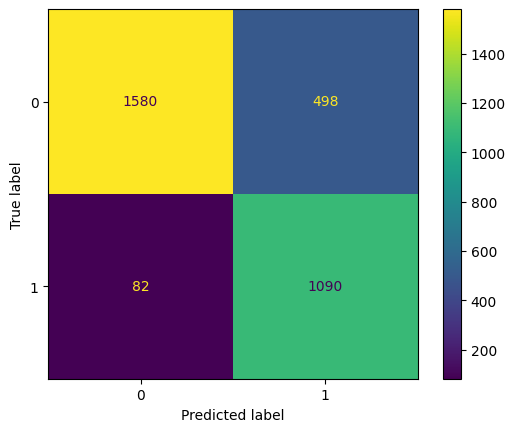

In [379]:
#Creating a Visual Confusion Matrix for Model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm_model4 = confusion_matrix(y_test,dtentropy_scaled_pred)
disp_model4 = ConfusionMatrixDisplay(confusion_matrix= cm_model4)
print("\n Confusion Matrix for Model 4:\n")
disp_model4.plot()

# Ensemble Models

## Random Forest



1.   How would you define a random forest?
2.   List a few features of a random forest prediction model?

Put your short answers below, and then train a model



### Answers
1. Random forest seems to be an ensemble model that utilizes multiple decision tree algorithms in their ensemble with each alogrithm utilizing a random selection of featured to be split by in each node. The split is only allowed to be on one of the k features selected randomly from a pool of all the m features of the dataset (where $k=\sqrt{m}$). The final prediction by the random forest is made after we have calculated the prediction on each model in the ensemble and selecting the class prediction with more number of occurences. When multiple decision trees are utilized in our ensemble, it can help us produce better and more accurate results specially when the trees are uncorrelated with each other.

2. Some notable features of the prediction model include:


  a. The RF Prediction model helps us curtail the problem of overfitting by utilizing multiple decision trees instead of a singular one and helps us create a more accurate prediction with the use of different decision trees.

  b. The mechanisms of how the model works is that the data gets fed into multiple decision tree models with each decision tree utilizing a random different set of features to split the data points further and makes the predictions on its own accord. Then once a set of final results from different decision trees is procured, the final result of the ensemble is selected from the set based on the frequency of occurences of different classes, thus aiding in the accuracy of the predictions.

### Training

In [380]:
from sklearn.ensemble import RandomForestClassifier

In [381]:
### Instantiate algorithm
rf = RandomForestClassifier()

### Fit the model to the data
rf.fit(X_train, y_train)
#Validate Model
### Predict on the test set
rf_pred = rf.predict(X_test)

In [382]:
# Classification Report

### Get performance metrics
rf_score = metrics.accuracy_score(y_test, rf_pred) * 100
rf_precision = metrics.precision_score(y_test, rf_pred) * 100
rf_recall = metrics.recall_score(y_test, rf_pred) * 100
rf_F1 = metrics.f1_score(y_test, rf_pred) * 100

### Print classification report
print("Classification report for {}:\n{}".format(rf, metrics.classification_report(y_test, rf_pred)))
print("Accuracy score:", rf_score)
print("F1 score:", rf_F1)
print("Precision score:",rf_precision)
print("Recall score",rf_recall)

Classification report for RandomForestClassifier():
              precision    recall  f1-score   support

           0       0.89      0.81      0.85      2078
           1       0.71      0.82      0.76      1172

    accuracy                           0.82      3250
   macro avg       0.80      0.82      0.81      3250
weighted avg       0.83      0.82      0.82      3250

Accuracy score: 81.53846153846153
F1 score: 76.20935765265664
Precision score: 71.18518518518519
Recall score 81.99658703071673



 Confusion Matrix for Model 5:



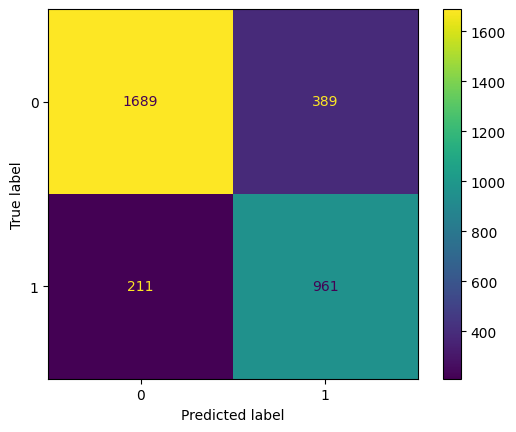

In [383]:
cm_model5 = confusion_matrix(y_test,rf_pred)
disp_model5 = ConfusionMatrixDisplay(confusion_matrix= cm_model5)
print("\n Confusion Matrix for Model 5:\n")
disp_model5.plot()

Utilizing a scaled Dataset


In [384]:
### Instantiate algorithm
rf2 = RandomForestClassifier()

### Fit the model to the data
rf2.fit(X_train_scaled, y_train)
#Validate Model
### Predict on the test set
rf_pred2 = rf2.predict(X_test_scaled)

In [385]:
# Classification Report

### Get performance metrics
rf_score1 = metrics.accuracy_score(y_test, rf_pred2) * 100
rf_precision1 = metrics.precision_score(y_test, rf_pred2) * 100
rf_recall1 = metrics.recall_score(y_test, rf_pred2) * 100
rf_F11 = metrics.f1_score(y_test, rf_pred2) * 100

### Print classification report
print("Classification report for {}:\n{}".format(rf2, metrics.classification_report(y_test, rf_pred2)))
print("Accuracy score:", rf_score1)
print("F1 score:", rf_F11)
print("Precision score:",rf_precision1)
print("Recall score",rf_recall1)

Classification report for RandomForestClassifier():
              precision    recall  f1-score   support

           0       0.89      0.81      0.84      2078
           1       0.70      0.81      0.76      1172

    accuracy                           0.81      3250
   macro avg       0.79      0.81      0.80      3250
weighted avg       0.82      0.81      0.81      3250

Accuracy score: 80.95384615384616
F1 score: 75.52392249901148
Precision score: 70.37582903463523
Recall score 81.48464163822526



 Confusion Matrix for Model 6:



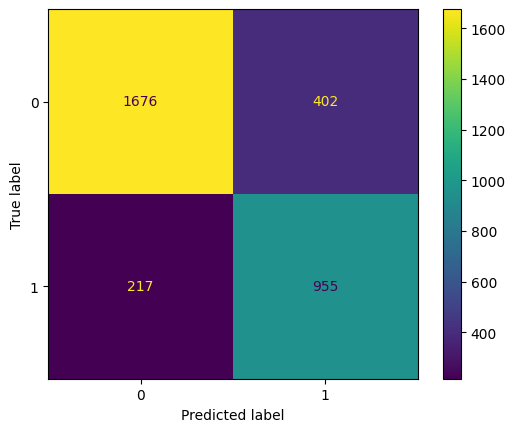

In [386]:
cm_model6 = confusion_matrix(y_test,rf_pred2)
disp_model6 = ConfusionMatrixDisplay(confusion_matrix= cm_model6)
print("\n Confusion Matrix for Model 6:\n")
disp_model6.plot()

# Performance comparison

Perform comparison of the obtained models, i.e., perform 10-fold cross validation with *cross_val_score()*, and T-test.

## Cross Validation

In [387]:
#Cross Validation
### Perform cross-validation then get the mean
rf_cv = (cross_val_score(rf, X, y, cv=10) * 100)
print("10-Fold Cross-Validation score(mean) of Random Forest:", np.mean(rf_cv))
rf_cv1 = np.mean(cross_val_score(rf2, X, y, cv=10) * 100)
print("10-Fold Cross-Validation score(mean) of Random Forest (Scaled):", np.mean(rf_cv1))

10-Fold Cross-Validation score(mean) of Random Forest: 76.1248401892886
10-Fold Cross-Validation score(mean) of Random Forest (Scaled): 76.18644683983784


In [388]:
dtginiunscaled_cv = (cross_val_score(decisiontreegini1, X, y, cv=10) * 100)
print("10-Fold Cross-Validation score(mean) of Decision Tree Gini Unscaled:", np.mean(dtginiunscaled_cv))
dtginiscaled_cv = (cross_val_score(decisiontreegini2, X, y, cv=10) * 100)
print("10-Fold Cross-Validation score(mean) of Decision Tree Gini Scaled:", np.mean(dtginiscaled_cv))


10-Fold Cross-Validation score(mean) of Decision Tree Gini Unscaled: 75.80461284908415
10-Fold Cross-Validation score(mean) of Decision Tree Gini Scaled: 75.55826198656075


In [389]:
dtentropyunscaled_cv = (cross_val_score(decisiontreeentropy1, X, y, cv=10) * 100)
print("10-Fold Cross-Validation score(mean) of Decision Tree Entropy Unscaled:", np.mean(dtentropyunscaled_cv))
dtentropyscaled_cv = (cross_val_score(decisiontreeentropy2, X, y, cv=10) * 100)
print("10-Fold Cross-Validation score(mean) of Decision Tree Entropy Scaled:", np.mean(dtentropyscaled_cv))

10-Fold Cross-Validation score(mean) of Decision Tree Entropy Unscaled: 76.17413156890188
10-Fold Cross-Validation score(mean) of Decision Tree Entropy Scaled: 76.0756548452184


## T-test

Before we begin with the T-tests, we will first be establishing the Null Hypothesis and the anti-thesis of the same.

H0: There is no significant difference between the predictions made between two comparable Machine Learning Models.

H1: There is a significant difference between the predictions made between two comparable Machine Learning Models.


In [390]:
from scipy.stats import ttest_ind

In [391]:
def t_testdifference(t_value,p_value,alpha):
  if p_value < alpha:
    print("We reject Null Hypothesis: There is a significant difference between the performance evaluation between two models!")
  else:
    print("We embrace the Null Hypothesis: There is no significant difference between the models evaluated!")


In [392]:
alpha = 0.05

In [393]:
#comparing the Decision Tree Gini Index between scaled and unscaled datasets
t_value, p_value = ttest_ind(dtginiunscaled_cv,dtginiscaled_cv )

In [394]:
t_testdifference(t_value,p_value,alpha)

We embrace the Null Hypothesis: There is no significant difference between the models evaluated!


In [395]:
#comparing between Decision Tree Entropy and Decision Tree Gini split trained on unscaled dataset
t_value1,p_value1 = ttest_ind(dtginiunscaled_cv,dtentropyunscaled_cv)

In [396]:
t_testdifference(t_value1,p_value1,alpha)

We embrace the Null Hypothesis: There is no significant difference between the models evaluated!


In [397]:
#comparing between Decision Tree Entropy and Random Forest Unscaled

In [398]:
t_value2,p_value2 = ttest_ind(rf_cv,dtentropyunscaled_cv)

In [399]:
t_testdifference(t_value2,p_value2,alpha)

We embrace the Null Hypothesis: There is no significant difference between the models evaluated!


# Conclusion

In Conclusion, we evaluated a non-numeric dataset which had classification of 'e' or 'p' with the presence of 'e' labels outweighing that of 'p' ones. Since all the feature values were non-numeric, we had to utilize one-hot encoding to turn the predictors and the classified labels of the dataset into numeric values. We utilized Decision Trees to solve the problem of classification and utilized two different iterations of split, the first one being based on Gini index and the second one on Entropy. We split the data set into training and testing in the ratio of 60:40. We used the two different criterion of decision trees into our training and test data set and evaluated the performance based on F1 scores, accuracy, recall and precision. We also train and test our data set with the encoded labels using Random Forest Ensemble model. In the end, we finally obtain the 10-fold cross validation scores of the various models that we have worked with and compare the performance using T-Tests. Since the p-values obtained were more than significance value alpha, all the models displayed similar levels of evaluation. We hyper-parameter tuned the parameter of max_depth in the arguments of the Decision Tree constructors to improve the evaluational metric scores of the models as compared to the results it procured with default values of the argument parameters.